In [181]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Covid/casos_obitos_doencas_preexistentes.csv',sep = ";", decimal = ',')

In [206]:
data.head(3)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santo André,3547809,37.0,FEMININO,CONFIRMADO,2021-01-11,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,São José do Rio Pardo,3549706,54.0,FEMININO,CONFIRMADO,2020-08-21,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,São Paulo,3550308,61.0,FEMININO,CONFIRMADO,2020-11-23,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [8]:
data.shape

(1679759, 20)

In [207]:
data2 = data[(data['diabetes'] != 'IGNORADO') & (data['cardiopatia'] != 'IGNORADO') & (data['doenca_renal'] != 'IGNORADO') & (data['obesidade'] != 'IGNORADO') ]

In [208]:
data2.head(5)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
36,Santo André,3547809,53.0,FEMININO,CONFIRMADO,2020-04-25,0,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
48,Ribeirão Preto,3543402,60.0,MASCULINO,CONFIRMADO,2020-07-26,0,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
59,São Paulo,3550308,89.0,FEMININO,CONFIRMADO,2020-12-07,0,NÃO,SIM,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO
85,São Paulo,3550308,23.0,FEMININO,CONFIRMADO,2020-04-16,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
99,Campinas,3509502,67.0,MASCULINO,CONFIRMADO,2020-12-25,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


In [209]:
data2['obito'].value_counts()

0    50145
1    24796
Name: obito, dtype: int64

In [210]:
data2 = data2[['obito', 'idade','diabetes', 'cardiopatia', 'doenca_renal', 'obesidade']]

In [211]:
data2.head(5)

,obito,idade,diabetes,cardiopatia,doenca_renal,obesidade
36,0,53.0,SIM,NÃO,NÃO,NÃO
48,0,60.0,SIM,NÃO,NÃO,NÃO
59,0,89.0,NÃO,SIM,NÃO,NÃO
85,0,23.0,NÃO,NÃO,NÃO,NÃO
99,0,67.0,NÃO,SIM,NÃO,NÃO


In [212]:
data2['obesidade'].value_counts()

NÃO    66399
SIM     8542
Name: obesidade, dtype: int64

In [229]:
X = data2.iloc[:,1:].values
y = data2.iloc[:,0].values

## Encoding categorical data

In [230]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop='first', sparse=False), [1,2,3,4])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [231]:
X[:,4]

array([53.0, 60.0, 89.0, ..., 70.0, 64.0, 38.0], dtype=object)

## Train Test split

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

In [216]:
X_train.shape

(56205, 5)

## Decision Tree

In [252]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=1234)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [253]:
y_pred = clf.predict(X_test)
print("Acuracia: %f" %(accuracy_score(y_test, y_pred)))

Acuracia: 0.684885


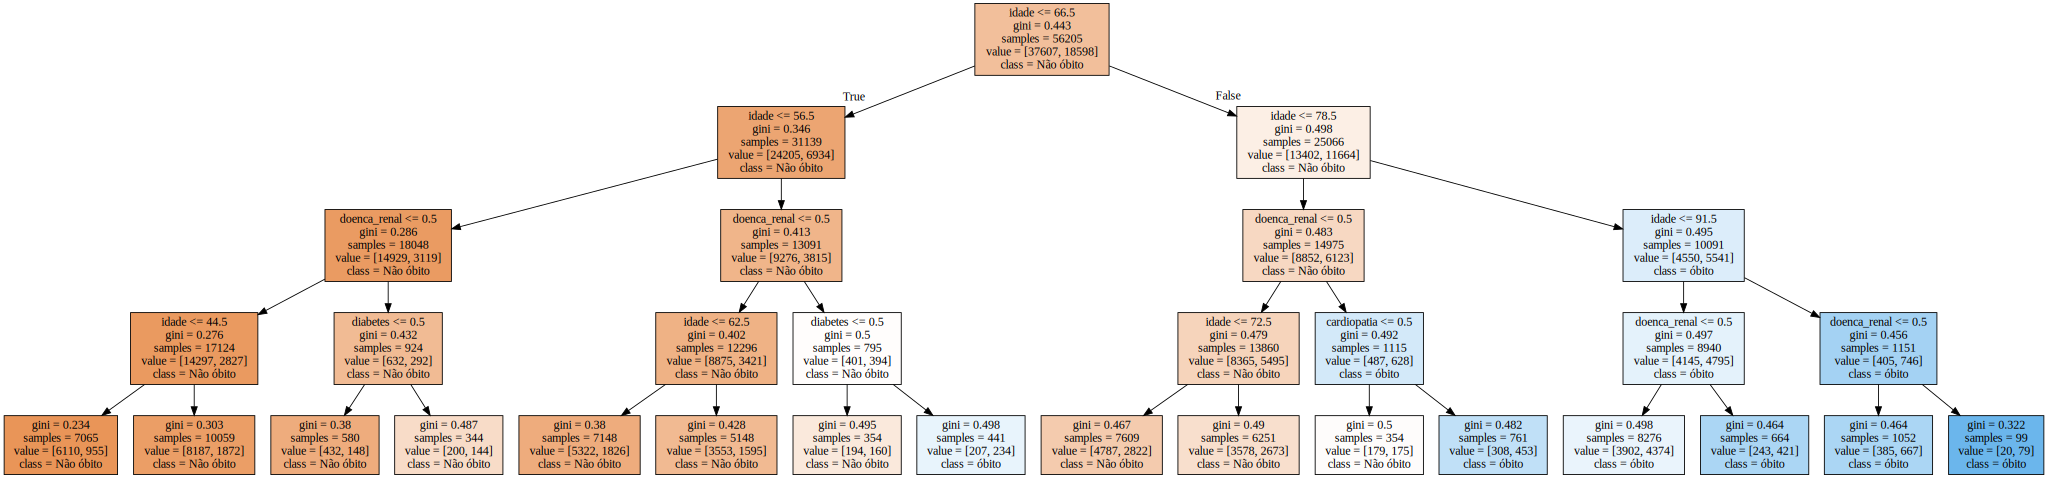

In [227]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,
                   class_names = resp,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph


In [228]:
graph.render("decision_tree_graphivz")


'decision_tree_graphivz.png'

## Logitic Regression

In [243]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,4] = sc.fit_transform(X_train[:,4].reshape(-1,1))[:,0]
X_test[:,4] = sc.transform(X_test[:,4].reshape(-1,1))[:,0]

In [245]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [254]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Acuracia: %f" %(accuracy_score(y_test, y_pred)))

[[11364  1173]
 [ 4710  1489]]
Acuracia: 0.686006


In [255]:
feature_cols
classifier.coef_
for i in range(0,5):
  print([feature_cols[i], classifier.coef_.T[i]])

['diabetes', array([0.14254425])]
['cardiopatia', array([-0.01555708])]
['doenca_renal', array([0.75637761])]
['obesidade', array([0.31896658])]
['idade', array([0.73285036])]
